In [1]:
import numpy as np
from scipy import signal
#from scipy.optimize import least_squares as curve_fit
from scipy.optimize import minimize as curve_fit
import matplotlib.pyplot as plt
import os

folder='3_21/'
folder2='3_25/'
folder3='4_17/'
folder4='4_24/'
filter1=np.ones(10)/10
filter2=np.ones(20)/20
Filter=filter2



c:\ProgramData\anaconda3\envs\ccatholo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def fitting_MP(filename,Z=10,Npoints=101,x0=np.zeros(3)):
    dz=np.linspace(0,Z,Npoints)
    n=0
    def fn_para(a,b,c):
        return a*(dz-b)**2+c
    print(filename)
    data=np.genfromtxt(filename)
    plt.plot(dz,(data[:,1]),'*',label=filename)
    plt.grid(axis='both')
    #data2=signal.convolve(data[:,1], Filter, mode='valid')
    #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
    def fn(para):
        a=para[0]
        b=para[1]
        c=para[2]
        r=(fn_para(a,b,c)-data[:,1])**2
        return r.mean()
    try:
        popt = curve_fit(fn,x0)
    except RuntimeError as e:
        print(e)
    data2=fn_para(popt.x[0],popt.x[1],popt.x[2])
    print('X0:',popt.x[1])

    plt.plot(dz,data2,'-',label=filename+'fit')
    #DZ+=dz[np.where(data2==data2.max())][0]
    n=n+1
    #plt.legend(fontsize=5)
    return popt.x

4_17/REN_4_17_80cm_tilt_absorb_3.dat
X0: 6.427341324359811
4_17/REN_4_17_80cm_tilt_absorb_4.dat
X0: 6.391675394259673
4_17/REN_4_17_80cm_tilt_absorb_5.dat
X0: 6.430280161444222
4_17/REN_4_17_80cm_tilt_absorb_6.dat
X0: 6.475623760110426
4_17/REN_4_17_80cm_tilt_absorb_7.dat
X0: 6.488827488218775
4_17/REN_4_17_80cm_tilt_absorb_8.dat
X0: 6.394473469955911
4_17/REN_4_17_80cm_tilt_absorb_9_f_-0_1.dat
X0: 6.185067252396106


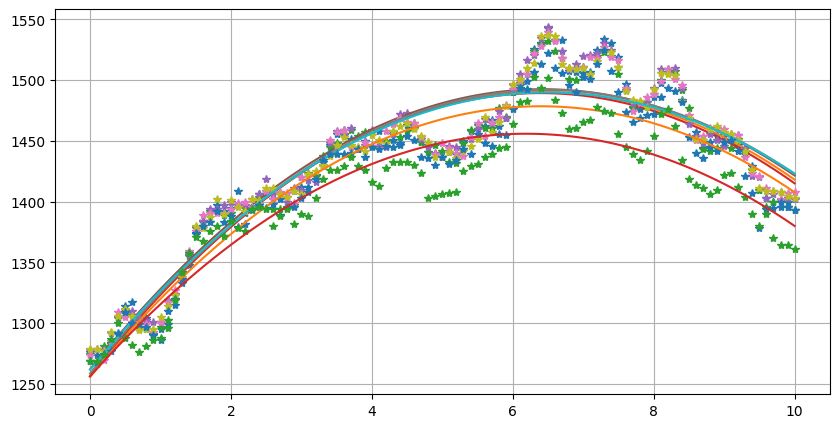

[  -5.21859948    6.18506725 1455.94444105]
4_17/REN_4_17_80cm_tilt_absorb_9_f_-0_2.dat
X0: 6.678808140436586
4_17/REN_4_17_80cm_tilt_absorb_9_f_-0_5.dat
X0: 8.128640937660585


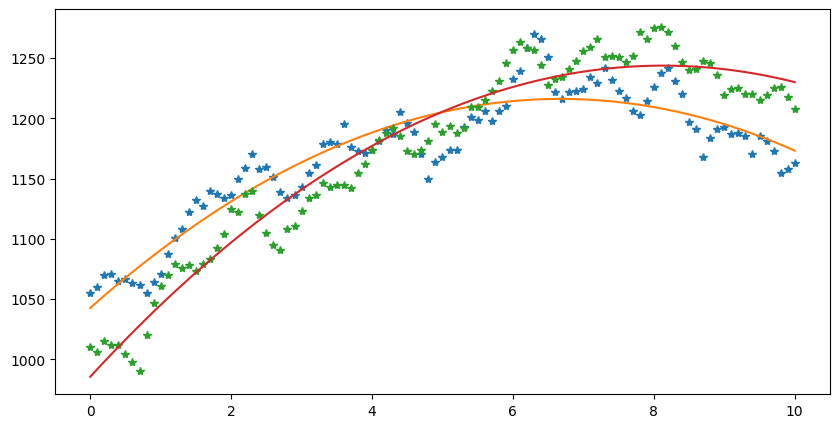

In [3]:
fig=plt.figure(figsize=(10,5))
for file in os.listdir(folder3)[5:12]:
    if file.startswith('REN_4_17_80cm_tilt_absorb_'):
        para=fitting_MP(folder3+file,x0=np.array([-7,7,1550]))
plt.show()
print(para)
fig=plt.figure(figsize=(10,5))
for file in os.listdir(folder3)[12:]:
    if file.startswith('REN_4_17_80cm_tilt_absorb_9'):
        para=fitting_MP(folder3+file,x0=np.array([-7,6.5,1250]))
plt.show()

D_75_0.dat
4_24/D_75_0.dat
X0: 6.0200741213085065
D_75_1.dat
4_24/D_75_1.dat
X0: 6.045336010261617
D_75_2.dat
4_24/D_75_2.dat
X0: 6.11650771729876


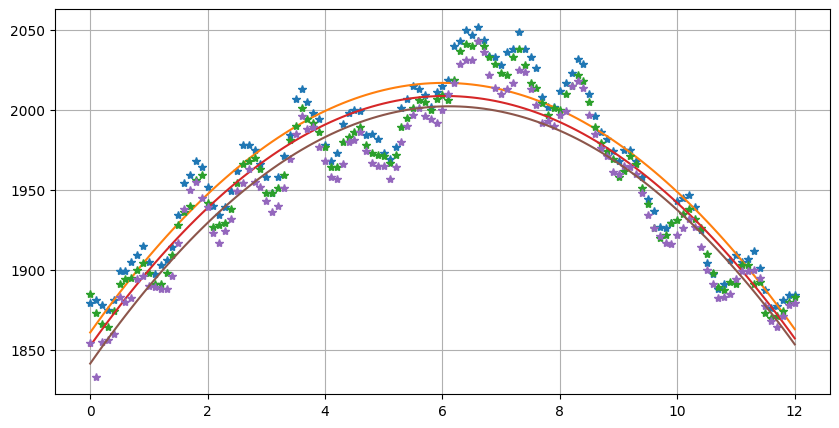

In [4]:
fig=plt.figure(figsize=(10,5))
for file in os.listdir(folder4):
    if file.startswith('D_75_'):
        print(file)
        para=fitting_MP(folder4+file,Z=12,Npoints=121,x0=np.array([-4,6.5,2050]))
plt.show()


In [6]:
4.2-6

-1.7999999999999998